In [33]:
import pandas as pd

# If the file is in the same folder as your notebook:
df = pd.read_csv('US_Accidents_March23.csv')

df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [35]:
pip install pandas numpy matplotlib seaborn plotly folium


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
df.info()

# Check missing values
df.isnull().sum() / len(df) * 100  # % missing

df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191315 entries, 0 to 1191314
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1191315 non-null  object 
 1   Source                 1191315 non-null  object 
 2   Severity               1191315 non-null  int64  
 3   Start_Time             1191315 non-null  object 
 4   End_Time               1191315 non-null  object 
 5   Start_Lat              1191315 non-null  float64
 6   Start_Lng              1191315 non-null  float64
 7   End_Lat                0 non-null        float64
 8   End_Lng                0 non-null        float64
 9   Distance(mi)           1191315 non-null  float64
 10  Description            1191312 non-null  object 
 11  Street                 1189603 non-null  object 
 12  City                   1191285 non-null  object 
 13  County                 1191315 non-null  object 
 14  State             

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1191315,1191315,A-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,1191315,2,Source2,1151225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Severity,1191315.0,NaN,NaN,NaN,2.32534,0.541201,1.0,2.0,2.0,3.0,4.0
Start_Time,1191315,1153871,2022-03-11 04:00:16,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Time,1191315,1157934,2016-10-14 19:50:00,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,1191315.0,NaN,NaN,NaN,36.07912,4.891243,24.5548,32.975277,35.317722,40.112154,48.998085
Start_Lng,1191315.0,NaN,NaN,NaN,-94.389323,17.170711,-124.497414,-117.18391,-87.830772,-80.89679,-67.553307
End_Lat,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End_Lng,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance(mi),1191315.0,NaN,NaN,NaN,0.189071,1.5264,0.0,0.0,0.0,0.01,336.570007


In [55]:
# Drop rows with too many missing key info (e.g., weather or road conditions)
df = df.dropna(subset=['Weather_Condition', 'Sunrise_Sunset', 'Start_Time', 'Start_Lat', 'Start_Lng'])

# Fill missing values if appropriate
df['Weather_Condition'].fillna('Unknown', inplace=True)

In [56]:
# Convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Create new columns
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

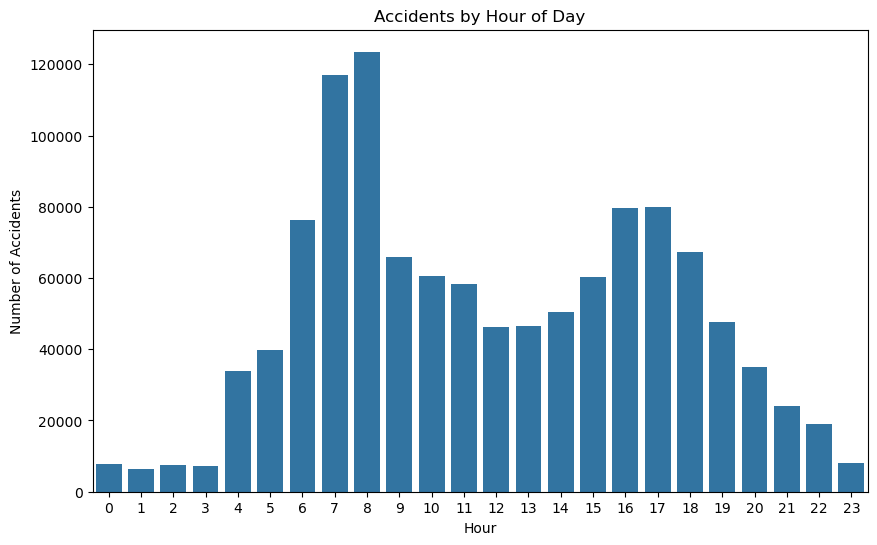

In [59]:
# Accidents by hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, order=sorted(df['Hour'].unique()))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()

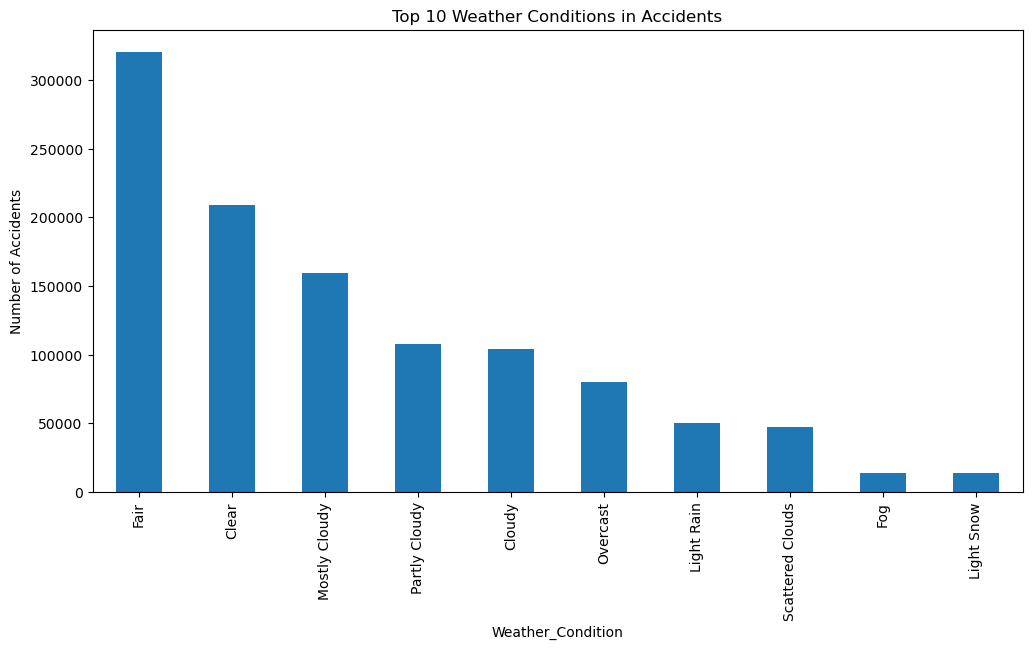

In [47]:
# Accidents by weather conditions
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Weather Conditions in Accidents')
plt.ylabel('Number of Accidents')
plt.show()


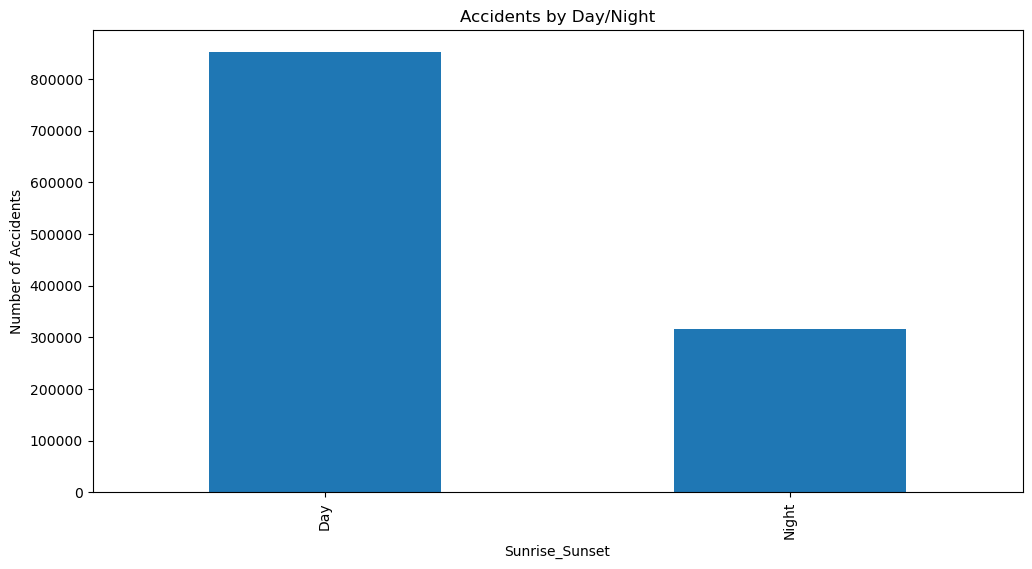

In [61]:
# Accidents by road conditions
plt.figure(figsize=(12,6))
df['Sunrise_Sunset'].value_counts().plot(kind='bar')
plt.title('Accidents by Day/Night')
plt.ylabel('Number of Accidents')
plt.show()


In [63]:
# Visualize accident hotspots
import folium

# Center map (let's choose the mean lat/lng of accidents)
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Plot a sample of 1000 points (too many points will slow map down)
for i in df.sample(1000).iterrows():
    folium.CircleMarker(
        location=[i[1]['Start_Lat'], i[1]['Start_Lng']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.3
    ).add_to(accident_map)

accident_map


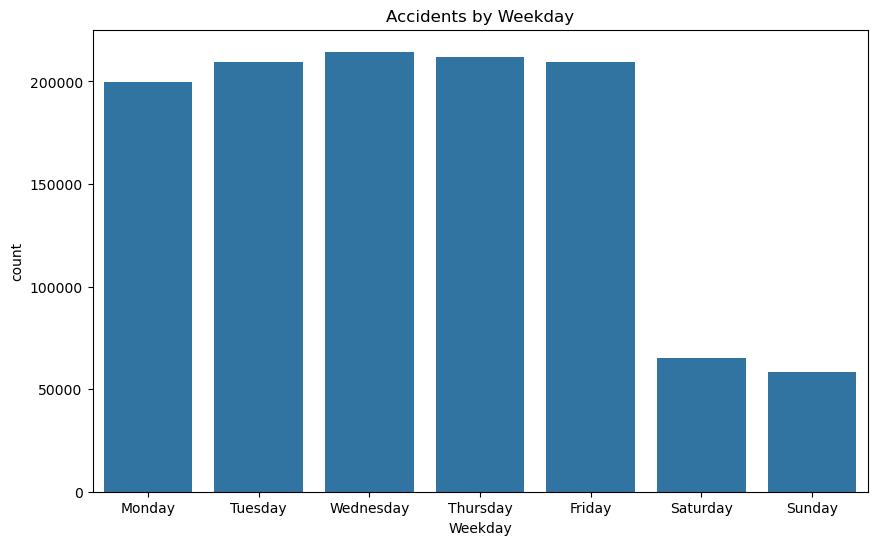

In [65]:
# Accidents by week day
plt.figure(figsize=(10,6))
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Weekday')
plt.show()


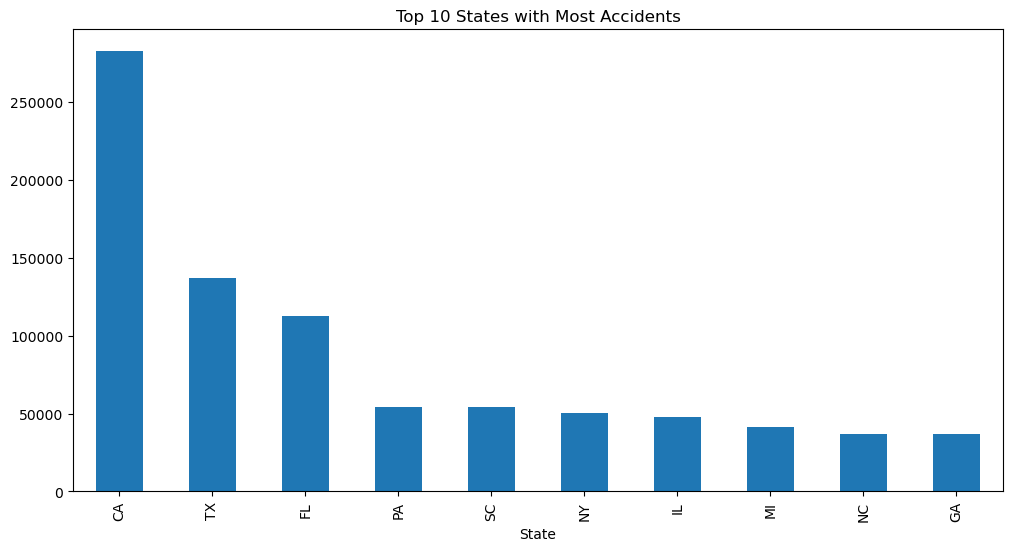

In [67]:
# Accidents by states
plt.figure(figsize=(12,6))
df['State'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States with Most Accidents')
plt.show()

In [69]:
# Save cleaned data
df.to_csv('US_Accidents_Cleaned.csv', index=False)

# Save plots
plt.savefig('accidents_by_hour.png')

<Figure size 640x480 with 0 Axes>